## Diamond Price Prediction
    price - price in US dollars (\$326--\$18,823)

    carat - weight of the diamond (0.2--5.01)

    cut - [quality of the cut (Fair, Good, Very Good, Premium, Ideal)]

    color - [diamond colour, from J (worst) to D (best)]

    clarity - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

    x - length in mm (0--10.74)

    y - width in mm (0--58.9)

    z - depth in mm (0--31.8)

    depth - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43-79)

    table - width of top of diamond relative to widest point (43--95)

### Importing Modules 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
df = pd.read_csv(r'C:/Users/nikhi/diamond_price_prediction/dataset/gemstone.csv') 
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [4]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
df.drop('id', axis=1, inplace=True)

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(193573, 10)

In [9]:
categorical_columns = df.columns[df.dtypes=='object']
numerical_columns = df.columns[df.dtypes!='object'] 

categorical_data = df[categorical_columns]
numerical_data = df[numerical_columns]

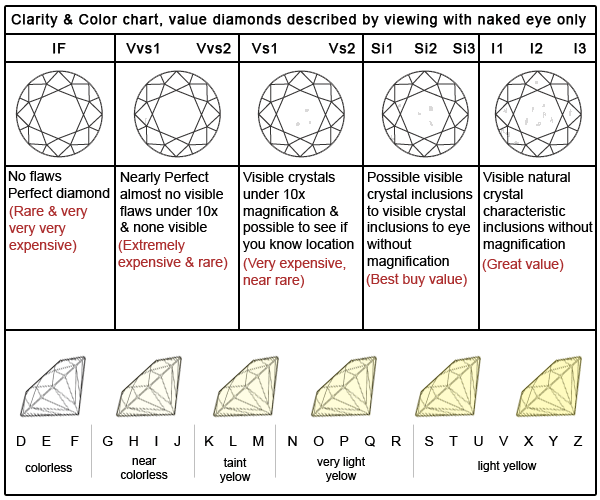

In [10]:
categorical_data.describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [11]:
categorical_data['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [12]:
categorical_data['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [13]:
categorical_data['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [14]:
numerical_data.describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [15]:
numerical_data=numerical_data[(numerical_data['x']!=0)&(numerical_data['y']!=0) & (numerical_data['z']!=0)]

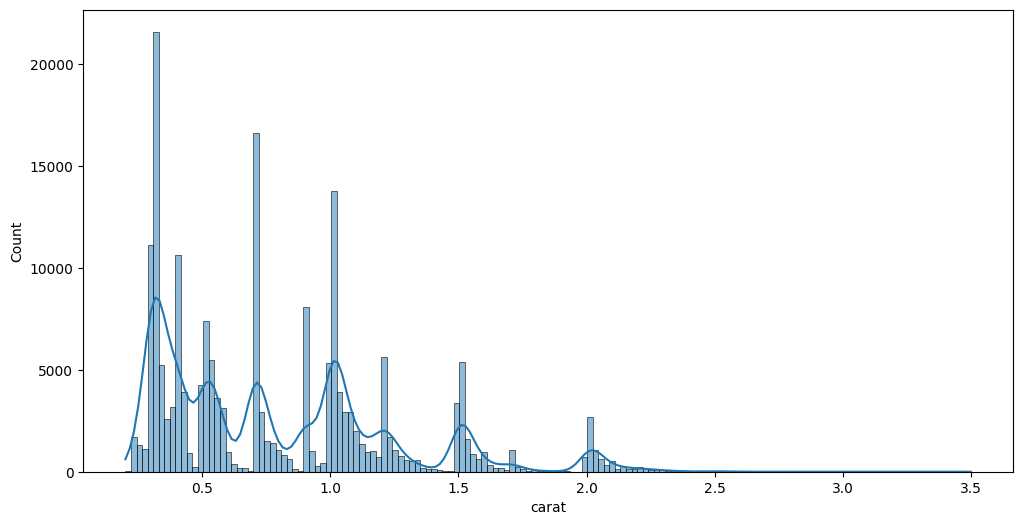

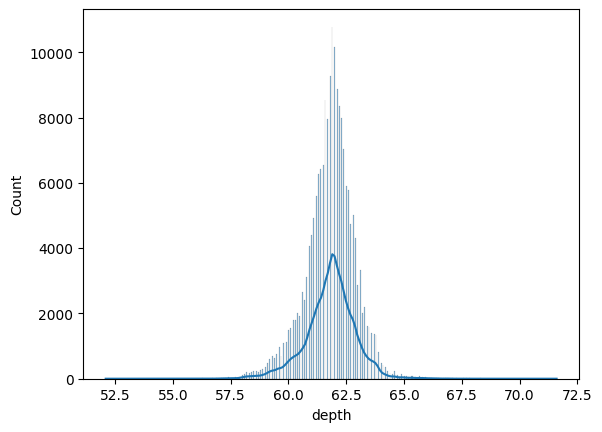

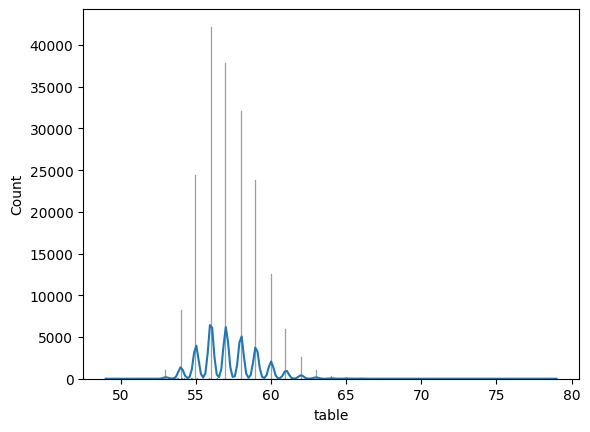

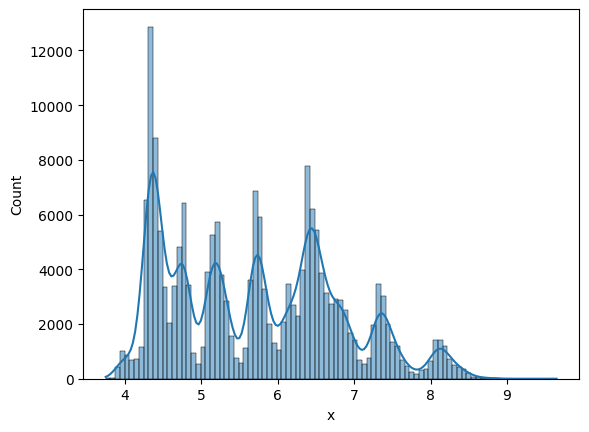

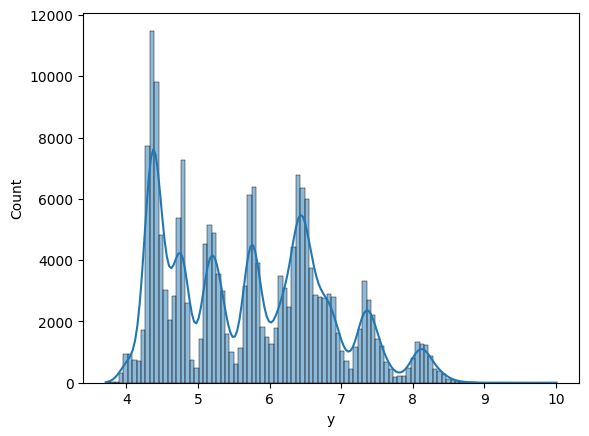

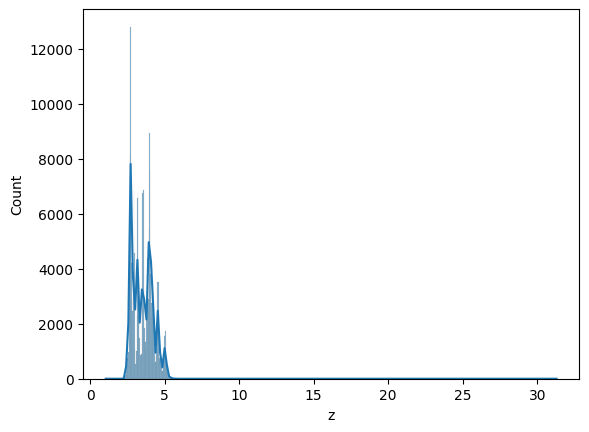

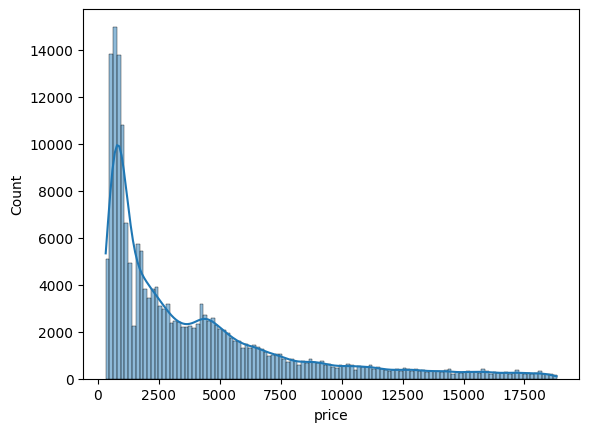

In [16]:
plt.figure(figsize=(12,6))

for column in numerical_columns:
    sns.histplot(data=numerical_data, x=column, kde=True)
    print('\n')
    plt.show()

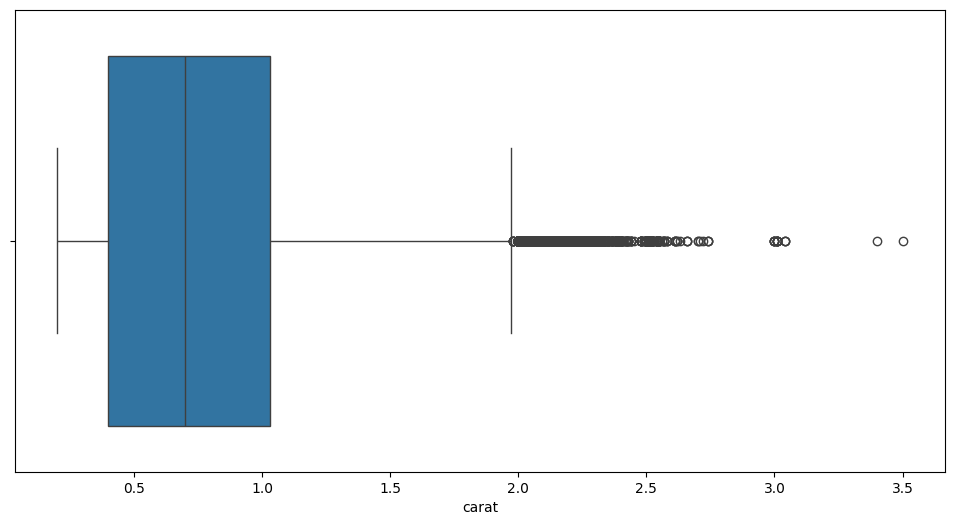

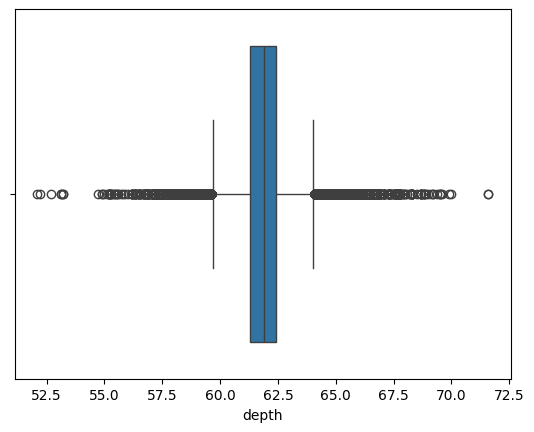

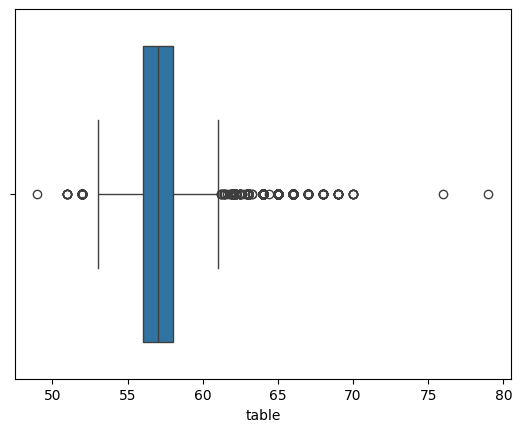

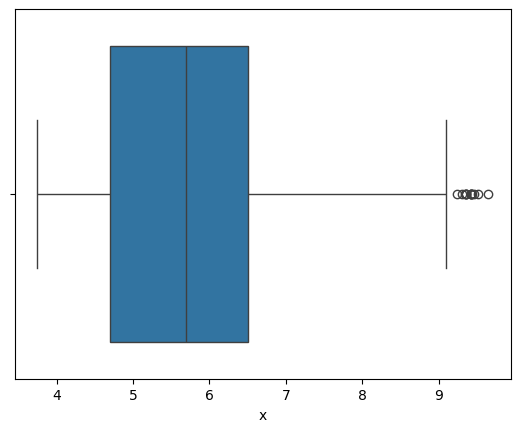

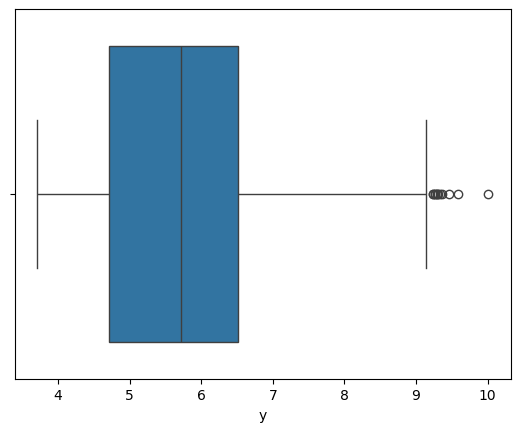

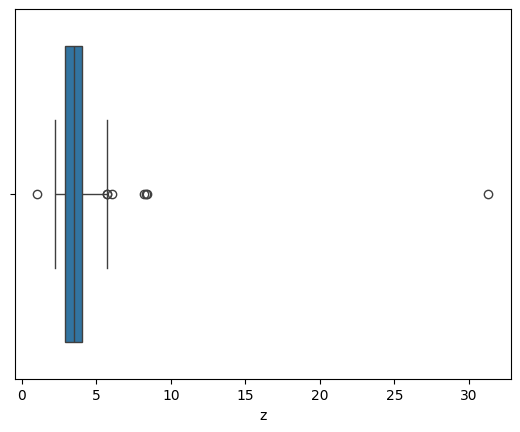

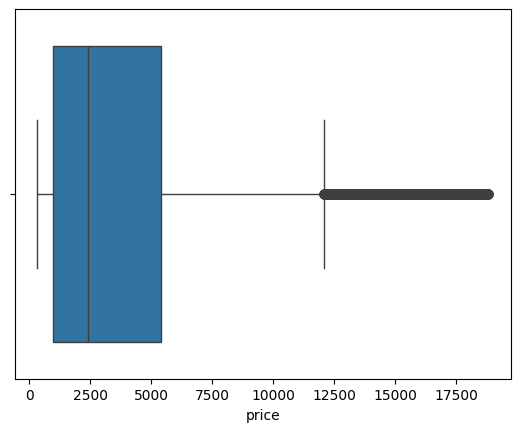

In [17]:
plt.figure(figsize=(12,6))

for column in numerical_columns:
    sns.boxplot(data=numerical_data, x=column)
    print('\n')
    plt.show()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_20936\1337785474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='icefire')


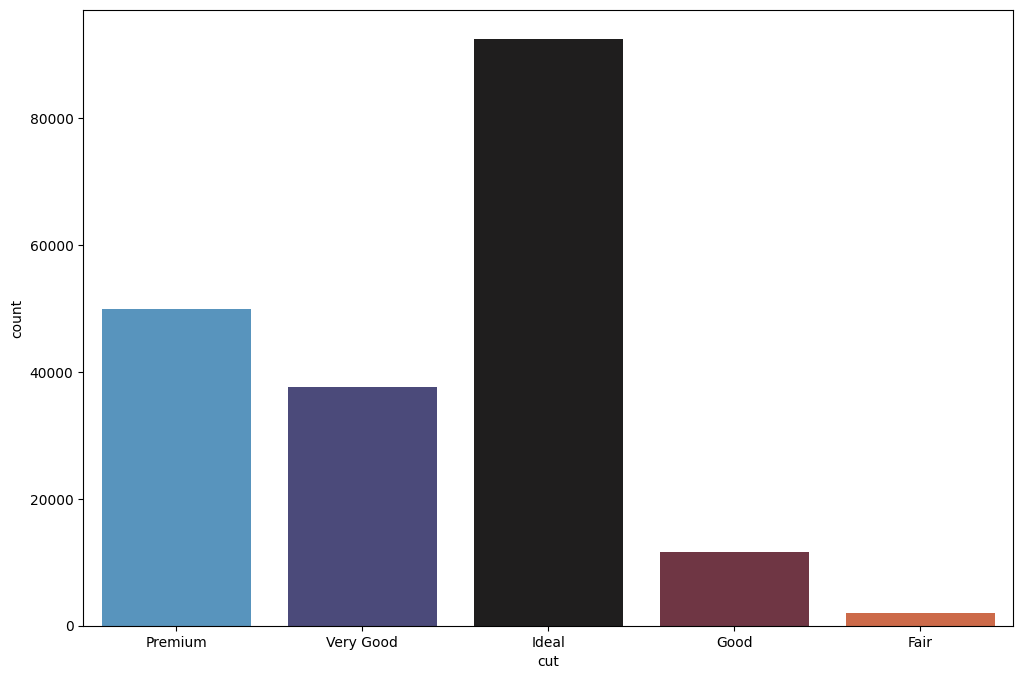

C:\Users\nikhi\AppData\Local\Temp\ipykernel_20936\1337785474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='icefire')


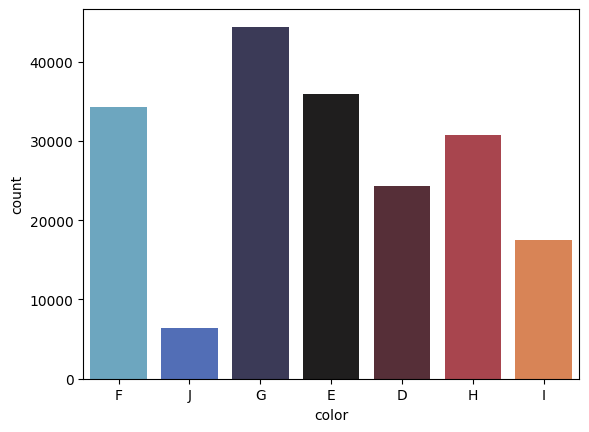

C:\Users\nikhi\AppData\Local\Temp\ipykernel_20936\1337785474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='icefire')


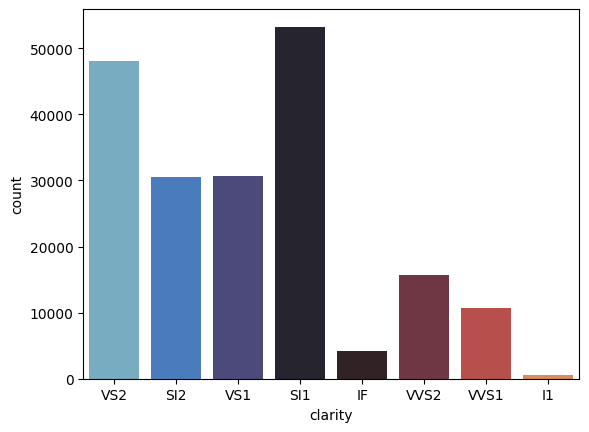

In [18]:
plt.figure(figsize=(12,8))
for col in categorical_columns:
    sns.countplot(data=df, x=col, palette='icefire')
    print('\n')
    plt.show()

<Axes: >

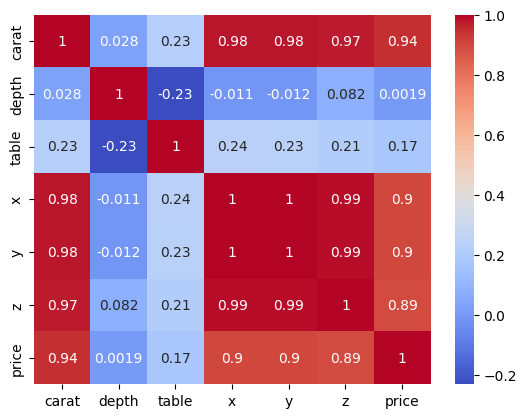

In [19]:
sns.heatmap(data=df[numerical_columns].corr(), annot=True, cmap='coolwarm')

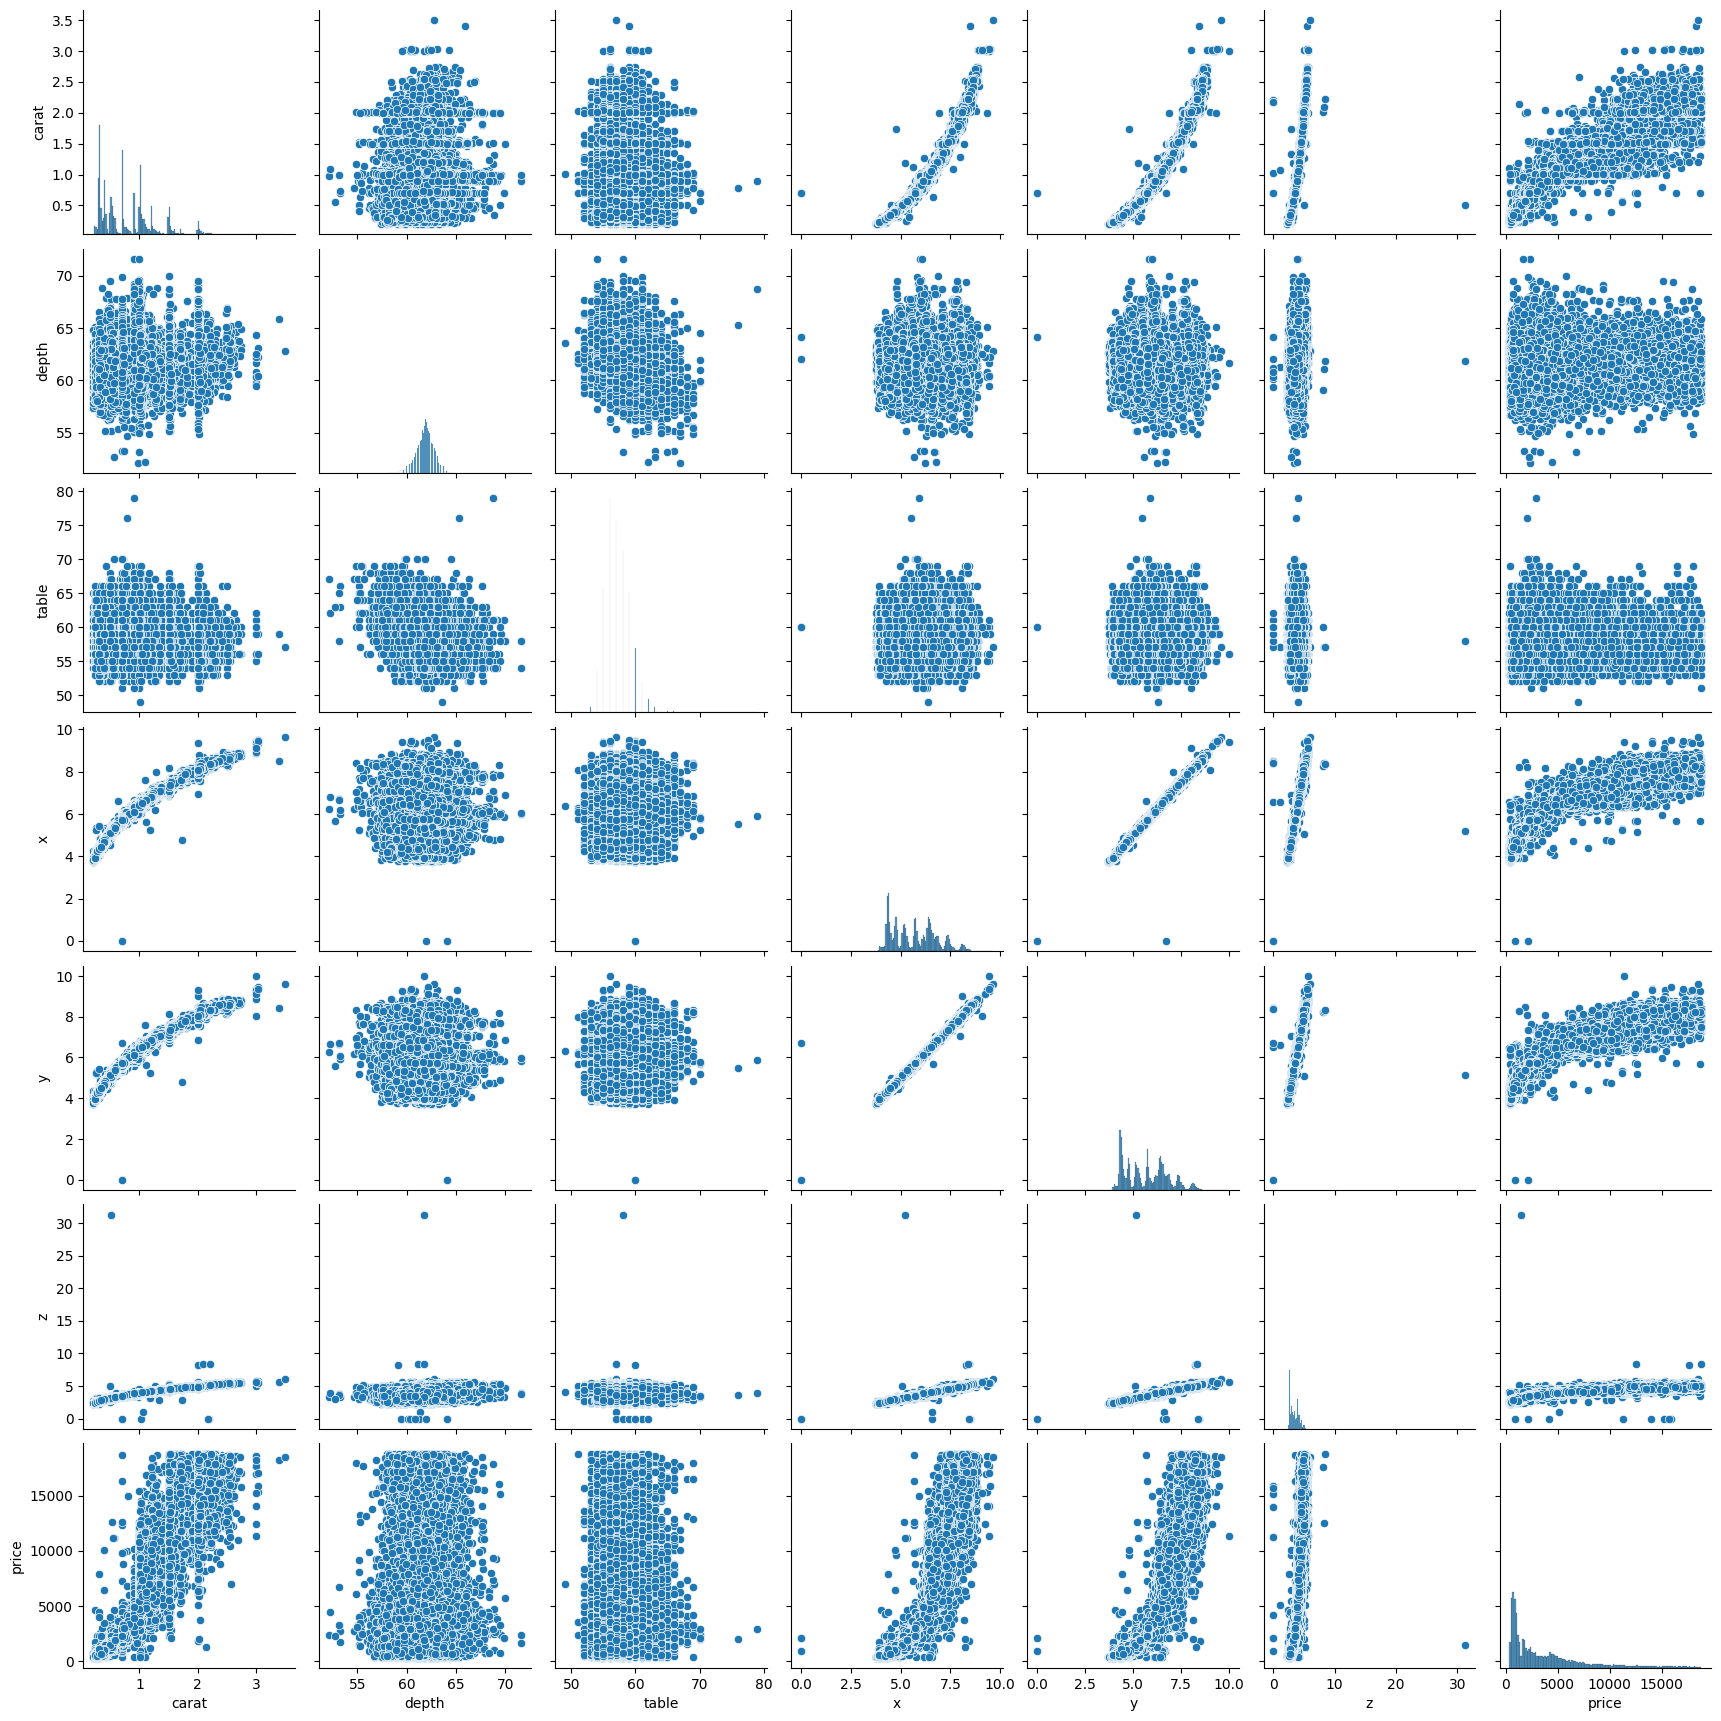

In [20]:
sns.pairplot(df)

In [21]:
X = df.drop(['depth','table','price'], axis=1)
y = df['price']

In [22]:
def outlier_treatment(df, columns:list, multiplier=1.5)->pd.DataFrame:
    outlier_df = df.copy()
    for col in columns:
        q1 = outlier_df[col].quantile(0.25)
        q3 = outlier_df[col].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - multiplier*iqr
        upper_bound = q3 + multiplier*iqr

        outlier_df[col] = outlier_df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    return outlier_df

In [23]:
numerical_columns = X.columns[X.dtypes != 'object']
categorical_columns = X.columns[X.dtypes == 'object']
treated_X = outlier_treatment(X, numerical_columns, multiplier=1.5)
treated_X.head()


,carat,cut,color,clarity,x,y,z
0,1.520,Premium,F,VS2,7.27,7.33,4.55
1,1.975,Very Good,J,SI2,8.06,8.12,5.05
2,0.700,Ideal,G,VS1,5.69,5.73,3.50
3,0.320,Ideal,G,VS1,4.38,4.41,2.71
4,1.700,Premium,G,VS2,7.65,7.61,4.77


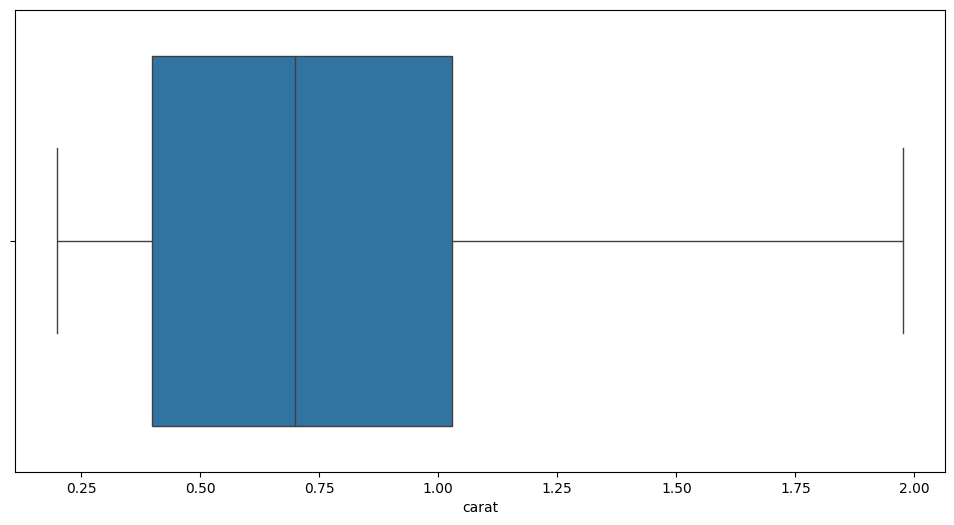

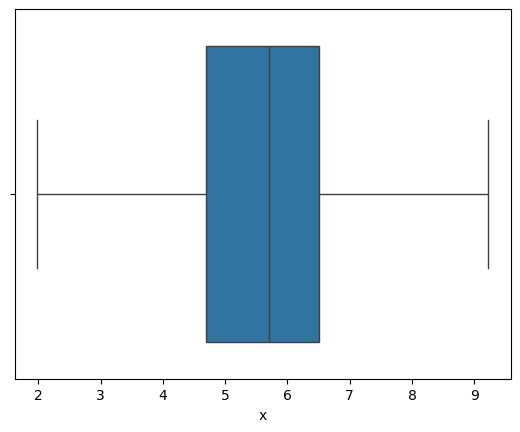

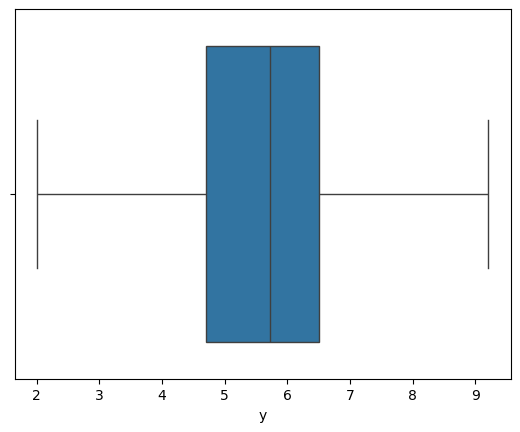

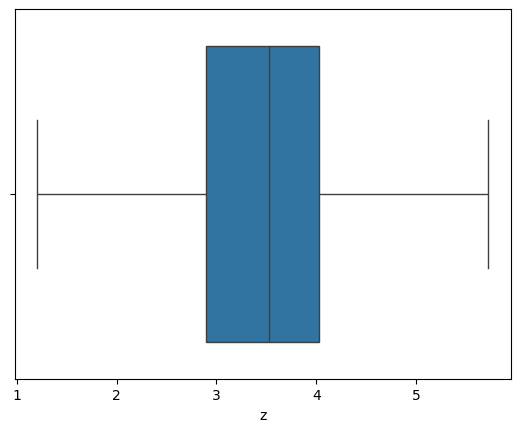

In [24]:
plt.figure(figsize=(12,6))

for column in numerical_columns:
    sns.boxplot(data=treated_X, x=column)
    print('\n')
    plt.show()

In [25]:
treated_X.shape

(193573, 7)

In [26]:
# Ordinal Ranking Per Category
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [28]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer()),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, numerical_columns),
    ('cat_pipeline', cat_pipeline, categorical_columns)
])

In [29]:
X_transformed = preprocessor.fit_transform(treated_X)
X_transformed 

array([[ 1.6256773 ,  1.40155684,  1.4606146 , ..., -0.13292877,
        -0.31800932,  0.01659085],
       [ 2.63428216,  2.1137528 ,  2.17736001, ..., -1.13880897,
         2.14643084, -1.31516933],
       [-0.19202816, -0.02283507,  0.00897833, ...,  0.87295143,
         0.29810072,  0.68247093],
       ...,
       [-0.12552674,  0.00421034,  0.02712378, ..., -1.13880897,
        -0.31800932, -0.64928924],
       [-0.99004519, -1.14071227, -1.11603978, ..., -1.13880897,
        -1.5502294 , -0.64928924],
       [-0.16986102,  0.01322548, -0.00916712, ..., -2.14468917,
        -0.93411936, -1.31516933]])

In [30]:
preprocessor.get_feature_names_out()

array(['num_pipeline__carat', 'num_pipeline__x', 'num_pipeline__y',
       'num_pipeline__z', 'cat_pipeline__cut', 'cat_pipeline__color',
       'cat_pipeline__clarity'], dtype=object)

In [31]:
X = pd.DataFrame(X_transformed, columns=preprocessor.get_feature_names_out())
X.head()

,num_pipeline__carat,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,1.625677,1.401557,1.460615,1.481795,-0.132929,-0.318009,0.016591
1,2.634282,2.113753,2.177360,2.211122,-1.138809,2.146431,-1.315169
2,-0.192028,-0.022835,0.008978,-0.049792,0.872951,0.298101,0.682471
3,-1.034379,-1.203818,-1.188622,-1.202129,0.872951,0.298101,0.682471
4,2.024686,1.744132,1.714651,1.802699,-0.132929,0.298101,0.016591


In [32]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [33]:
def evaluate_regression(predicted, true):
    mse = mean_squared_error(predicted, true)
    mae = mean_absolute_error(predicted, true)
    r2 = r2_score(predicted, true)

    return mse, mae, r2 

def evaluate_models(X, y, models): 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=30)
    models_list = []
    score_list = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
         
        # model_train_mse, model_train_mae, model_train_r2 = evaluate_regression(y_train_pred, y_train)
        model_test_mse, model_test_mae, model_test_r2 = evaluate_regression(y_test_pred, y_test)

        
        
        
        print(model_name)
        models_list.append(model_name)
        # print('Model performance for Training set')
        # print('- Mean Squared Error (MSE): {:.4f}'.format(model_train_mse))
        # print('- Mean Absolute Error (MAE): {:.4f}'.format(model_train_mae))
        # print('- R-squared: {:.4f}'.format(model_train_r2))
        

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Mean Squared Error (MSE): {:.4f}'.format(model_test_mse))
        print('- Mean Absolute Error (MAE): {:.4f}'.format(model_test_mae))
        print('- R-squared: {:.4f}'.format(model_test_r2 * 100))

        score_list.append(model_test_r2)
        print('=='*20)
    
    report = pd.DataFrame(list(zip(models_list, score_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)
    return report




In [34]:
# RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor()
    
}

In [35]:
report = evaluate_models(X, y, models=models)


Linear Regression
----------------------------------
Model performance for Test set
- Mean Squared Error (MSE): 994479.8205
- Mean Absolute Error (MAE): 666.5179
- R-squared: 93.4567
Lasso
----------------------------------
Model performance for Test set
- Mean Squared Error (MSE): 994831.4298
- Mean Absolute Error (MAE): 666.9285
- R-squared: 93.4459
Ridge
----------------------------------
Model performance for Test set
- Mean Squared Error (MSE): 994490.1258
- Mean Absolute Error (MAE): 666.5398
- R-squared: 93.4562
ElasticNet
----------------------------------
Model performance for Test set
- Mean Squared Error (MSE): 2415311.6912
- Mean Absolute Error (MAE): 1074.4725
- R-squared: 77.3797
RandomForestRegressor
----------------------------------
Model performance for Test set
- Mean Squared Error (MSE): 386770.5630
- Mean Absolute Error (MAE): 317.8894
- R-squared: 97.5738
AdaBoostRegressor
----------------------------------
Model performance for Test set
- Mean Squared Error (MSE)

In [39]:
report 

,Model Name,R2_Score
6,GradientBoostingRegressor,0.975786
4,RandomForestRegressor,0.975738
7,DecisionTreeRegressor,0.956457
0,Linear Regression,0.934567
2,Ridge,0.934562
1,Lasso,0.934459
5,AdaBoostRegressor,0.859678
3,ElasticNet,0.773797


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=30)

In [34]:
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter grid 
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    
}

grad = GradientBoostingRegressor()

random_search = RandomizedSearchCV(
    estimator=grad,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print(f"Best Parameters : {best_params}")

c:\Users\nikhi\diamond_price_prediction\venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 27 is smaller than n_iter=100. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 27 candidates, totalling 135 fits


KeyboardInterrupt: 

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming X, y are your feature and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestRegressor instance
rf = GradientBoostingRegressor(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': best_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print("Feature Importances:")
print(feature_importances)


KeyboardInterrupt: 